## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on=("Mouse ID"))
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol = merge_df.loc[:,["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
# check that you've gotten tumor volume with drug name ---> tumor_vol.head()
tumor_summary = tumor_vol.groupby(["Drug Regimen","Timepoint"]).agg({"Tumor Volume (mm3)":["mean", "median", "var","std","sem"]})
tumor_summary

Tumor Volume (mm3)                                  \
                                     mean     median        var       std   
Drug Regimen Timepoint                                                      
Capomulin    0                  45.000000  45.000000   0.000000  0.000000   
             5                  44.266086  45.597064   5.030889  2.242964   
             10                 43.084291  43.421014  12.344133  3.513422   
             15                 42.064317  42.798160  16.878693  4.108369   
             20                 40.716325  40.716428  19.035028  4.362915   
...                                   ...        ...        ...       ...   
Zoniferol    25                 55.432935  55.676604   5.808348  2.410052   
             30                 57.713531  57.419744   9.601024  3.098552   
             35                 60.089372  60.365832  10.876760  3.297993   
             40                 62.916692  62.274543  13.958456  3.736102   
             45                 65.960888  65.684689  14.100301  3.755037   

                                  
                             sem  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

## Bar plots

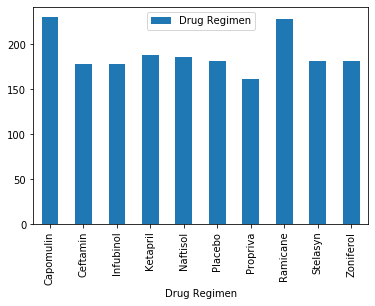

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_groups = merge_df.groupby("Drug Regimen")
count_drugs = drug_groups["Drug Regimen"].count()

graph_df = pd.DataFrame({"Drug Regimen": count_drugs})
graph_df.plot.bar(rot=90)

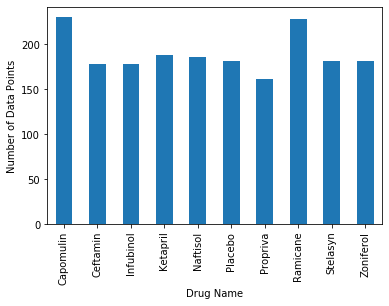

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_groups = merge_df.groupby("Drug Regimen")
count_drugs = drug_groups["Drug Regimen"].count()
# count how many drugs appear ---> count_drugs

drug_chart = count_drugs.plot(kind="bar")
# Set the xlabel and ylabel using class methods
drug_chart.set_xlabel("Drug Name")
drug_chart.set_ylabel("Number of Data Points")


plt.show()
plt.tight_layout()

## Pie plots

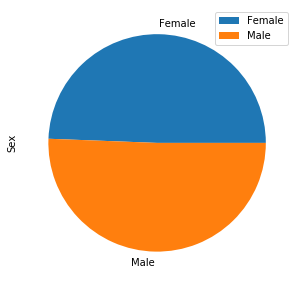

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_drug_groups = merge_df.groupby("Sex")
pie_count_drugs = pie_drug_groups["Sex"].count()

graph_pan = pd.DataFrame({"Sex": pie_count_drugs})
plot = graph_pan.plot.pie(y="Sex", figsize=(5, 5))


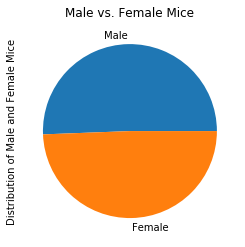

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot = merge_df["Sex"].value_counts()

gender_pyplot_pie = gender_pyplot.plot(kind="pie", title="Male vs. Female Mice")
gender_pyplot_pie.set_ylabel("Distribution of Male and Female Mice")

plt.show()
plt.tight_layout()


## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor = merge_df.drop(["Mouse ID", "Metastatic Sites"], axis =1)
tumor_index= tumor.groupby(["Drug Regimen", "Timepoint"]).mean()
tumor_index = tumor_index.reset_index()

cap =tumor_index.loc[tumor_index["Drug Regimen"]=="Capomulin"]
cap.head()

,Drug Regimen,Timepoint,Age_months,Weight (g),Tumor Volume (mm3)
0,Capomulin,0,14.040000,20.120000,45.000000
1,Capomulin,5,14.040000,20.120000,44.266086
2,Capomulin,10,14.040000,20.120000,43.084291
3,Capomulin,15,13.666667,20.000000,42.064317
4,Capomulin,20,13.304348,19.782609,40.716325


## Line and scatter plots

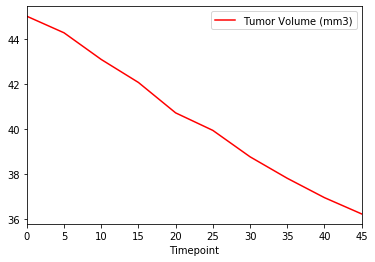

In [48]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor = merge_df.drop(["Mouse ID"],axis = 1)
tumor_index= tumor.groupby(["Drug Regimen", "Timepoint"]).mean()
tumor_index = tumor_index.reset_index()

cap =tumor_index.loc[tumor_index["Drug Regimen"]=="Capomulin"]
# have to create index in order to isolate capomulin 

ax = plt.gca()

cap.plot(kind='line',x="Timepoint",y="Tumor Volume (mm3)", color='red', ax=ax)

plt.show()

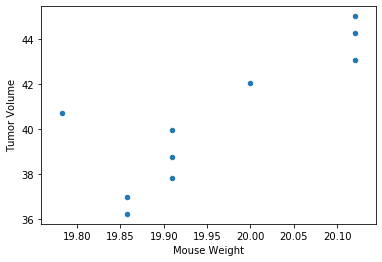

In [36]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor = merge_df.drop(["Mouse ID", "Metastatic Sites"], axis =1)
tumor_index= tumor.groupby(["Drug Regimen", "Timepoint"]).mean()
tumor_index = tumor_index.reset_index()

cap =tumor_index.loc[tumor_index["Drug Regimen"]=="Capomulin"]

cap.plot.scatter(x = "Weight (g)",
                 y = "Tumor Volume (mm3)")

plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show()           

In [141]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen